In [1]:
!pip install -q -U google-generativeai

In [2]:
import google.generativeai as genai
from IPython.display import Markdown
from PIL import Image

In [3]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

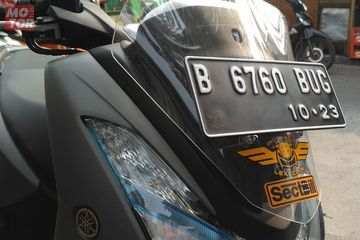

In [12]:
image="/content/plat_no.jpg"
image = Image.open(image)
image

In [15]:
# Upload the file and print a confirmation.
license_plate = genai.upload_file(path="/content/plat_no.jpg",
                            display_name="License Plate")

print(f"Uploaded file '{license_plate.display_name}' as: {license_plate.uri}")

Uploaded file 'License Plate' as: https://generativelanguage.googleapis.com/v1beta/files/uzmzpewtriw2


In [16]:
# Function to transform plat_exp
def transform_plat_exp(plat_exp):
    # Mapping of month numbers to names
    months = {
        "01": "January", "02": "February", "03": "March", "04": "April",
        "05": "May", "06": "June", "07": "July", "08": "August",
        "09": "September", "10": "October", "11": "November", "12": "December"
    }

    # Split the input into month and year
    month, year = plat_exp.split()

    # Convert the year to full year (assuming 2000s for simplicity)
    full_year = "20" + year if len(year) == 2 else year

    # Return the transformed date
    return f"{months[month]} {full_year}"

In [17]:
# Choose a Gemini model.
model = genai.GenerativeModel(model_name="gemini-1.5-pro-latest")

# Prompt the model with text and the previously uploaded image.
response = model.generate_content([license_plate, "read the plate number of the image with output example (‘plat_no’: ‘B 1234 ABC’,	‘vehicle’: ‘car’,‘vehicle_type’: ‘sedan’,	‘color’: ‘red’,	‘gate_open’: ‘2024-12-02 18.15.01’,	‘gate_closed’: ‘N/A’,‘plat_exp’: ‘03 22 (March 2022)’,)"])

Markdown(response.text)

```json
{
  "plat_no": "B 6760 BUG",
  "vehicle": "motorcycle",
  "vehicle_type": "scooter",
  "color": "gray",
  "gate_open": "N/A",
  "gate_closed": "N/A",
  "plat_exp": "10 23 (October 2023)"
}
```